# Introduction to TensorFlow and Gradient Descent

## 1 Introduction to TensorFlow

In [1]:
# Library om YouTube videos te importeren 

from IPython.display import YouTubeVideo, Image

In [ ]:
!pip install -U tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 1.1 What is TensorFlow?

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


TensorFlow is an open-source software library developed by Google. Originally, TensorFlow was developed for  accelerating most traditional numerical calculations. Nowadays however, TensorFlow is widely for building and training machine learning models. It was first released in 2015 and has since become one of the most widely used libraries for **deep learning**.

The library provides a programming interface for building and training various types of machine learning models, including neural networks (for deep learning), decision trees, and k-nearest neighbors. It allows developers to define and optimize computational graphs that represent the flow of data through a machine learning model.

Some of the key features of TensorFlow are:

1. **Efficient computation:** TensorFlow is designed to efficiently perform matrix operations, which are fundamental to neural network computation. This makes it possible to build and train large-scale neural networks more quickly than with traditional computing methods. TensorFlow also provides automatic differentiation, which we will explore in the remainder of this notebook.

2. **Flexible architecture:** TensorFlow's flexible architecture allows developers to build and train a wide range of neural network architectures, from simple feedforward networks to more complex models like convolutional neural networks and recurrent neural networks.

3. **Distributed training:** TensorFlow supports distributed computing, which makes it possible to train large-scale neural networks across multiple devices or clusters of machines. This can significantly reduce training time for complex models.

4. **Easy deployment:** TensorFlow models can be easily deployed to a wide range of platforms, including mobile devices, web applications, and cloud services. This makes it possible to build neural network applications that can run anywhere.

5. **Community support:** TensorFlow has a large and active community of developers who contribute to the development of the library and provide support to other users. This makes it easy to find help, documentation, and examples of how to use TensorFlow to build and train neural networks.

### 1.2 Tensors and numpy arrays

- A tensor is just an $n$-dimensional matrix.
- The *rank* of a tensor is the number of dimensions it has (alternatively, the number of indices you have to specify to get at an element).
- A vector is a rank $\color{blue} 1$ tensor.
- A matrix is a rank $\color{blue} 2$ tensor.
- Tensor is characterized by its shape and the data type of its elements. 
- The shape is a specification of the number of dimensions and the length of the tensor in each of those dimensions.
- Shape is described by an integer vector giving the lengths in each dimension.
- For example, $\left[\begin{array}{cc} 1 & 0 \\ 0 & 1 \\ 1 & 1 \end{array}\right]$ is tensor of shape [3, 2].
- On the other hand, $\left[\begin{array}{cc} [1] & [0] \\ [0] & [1] \\ [1] & [1] \end{array}\right]$ is a tensor of shape [3, 2, 1].
- The shape is read starting from the "outside" and moving in until you reach  
  an elementary object (e.g. number or string).
- Note that Tensors are not just arbitrary arrays. For example, $[1, [2]]$ is 
  not a Tensor and has no unambiguous shape.
- TensorFlow shapes are almost the same as numpy shapes.
- You can convert data from a tensor to a numpy array. If you have a numpy array with a valid shape, you can convert it into a tensor.

In [3]:
import matplotlib.pyplot as plt

In [4]:
import tensorflow as tf

# Scalar tensor
scalar = tf.constant(42)

# 1D tensor
vector = tf.constant([1, 2, 3, 4, 5])

# 2D tensor
matrix = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# 3D tensor
tensor3d = tf.constant([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])

# 4D tensor
tensor4d = tf.constant([[[[1, 2], [3, 4]], [[5, 6], [7, 8]]], [[[9, 10], [11, 12]], [[13, 14], [15, 16]]]])

# Variable-sized tensor
variable_size_tensor = tf.Variable(tf.random.normal([5, 10]))  # creates a 5x10 tensor with random values

# Random tensor
random_tensor = tf.random.normal([3, 3])  # creates a 3x3 tensor with random values from a normal distribution

# Create a bunch of zeros of a specific shape and type.
zero_tensor = tf.zeros([2, 2], dtype=tf.float64)

# tf.zeros_like is pretty useful. It creates a zero tensors which is shaped like some other tensor you supply.
x = tf.constant([[[1], [2]]])
zeros_like_x = tf.zeros_like(x, dtype=tf.float32)

In [5]:
print(f"scalar: {scalar}\n\nvector: {vector}\n\nmatrix:\n\n{matrix}\n\n3D tensor:\n\n{tensor3d}\n\n \
4D tensor:\n\n{tensor4d}\n\nVStensor:\n\n{variable_size_tensor}\n\nrandtensor:\n\n{random_tensor}\n\n \
zero_tensor:\n\n{zero_tensor}\n\nx:\n{x}\n\nzeros_like_x:\n\n{zeros_like_x}")

scalar: 42

vector: [1 2 3 4 5]

matrix:

[[1 2 3]
 [4 5 6]
 [7 8 9]]

3D tensor:

[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]

 4D tensor:

[[[[ 1  2]
   [ 3  4]]

  [[ 5  6]
   [ 7  8]]]


 [[[ 9 10]
   [11 12]]

  [[13 14]
   [15 16]]]]

VStensor:

<tf.Variable 'Variable:0' shape=(5, 10) dtype=float32, numpy=
array([[-0.28091553, -1.837831  , -1.1959616 , -0.57047087, -0.202925  ,
         0.30935207,  0.82976705,  0.91610795,  0.297588  ,  2.3265262 ],
       [-0.77804565, -1.1588221 , -0.40027797,  0.33467233, -0.18686059,
         0.8329455 , -0.20839685,  0.3156517 ,  1.8031838 , -0.64244246],
       [ 1.0497879 ,  1.507228  ,  0.29683512,  0.87516016,  0.47975817,
         1.0587385 ,  1.3401195 ,  1.3793533 ,  0.17292191, -1.1345881 ],
       [ 0.65027547,  0.07577645,  2.3451424 ,  0.8265958 , -0.17703949,
        -1.3682603 , -0.56227344, -0.05387042, -0.57008415,  0.79937834],
       [-0.10059043,  0.9366106 ,  0.37280774,  1.760511  ,  0.14408688,
        -0.17546739, -0.03057182,

Note that in the above code, we use tf.constant to create tensors with fixed values, and tf.Variable to create tensors with variable values that can be updated during training. We also use tf.compat.v1.placeholder to create tensors that will be fed with values at runtime, and tf.random.normal to create tensors with random values.

Print some of the values above and see what is displayed on the screen.

In [13]:
# Convert tensor to numpy array

import numpy as np

# Create a 2D tensor
tensor = tf.constant([[1, 2, 3], [4, 5, 6]])

# Convert the tensor to a numpy array
array = tensor.numpy()

# Print the tensor
print(tensor)

# Print the numpy array
print(array)

tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)
[[1 2 3]
 [4 5 6]]


### 1.2 Operations with tensors 

You can perform various kinds of mathematical operations on tensors. Here are some examples. Try printing the output of some of these operations.

In [14]:
# Define two constant tensors
a = tf.constant([[1.0, 2.0], [3.0, 4.0]])
b = tf.constant([[5.0, 6.0], [7.0, 8.0]])

# Element-wise addition
c = tf.add(a, b)

# Element-wise subtraction
d = tf.subtract(a, b)

# Element-wise multiplication
e = tf.multiply(a, b)

# Element-wise division
f = tf.divide(a, b)

# Matrix multiplication
g = tf.matmul(a, b)

# Square root
h = tf.sqrt(a)

# Exponential
i = tf.exp(a)

# Logarithm
j = tf.math.log(a)

# Sine
k = tf.sin(a)

# Cosine
l = tf.cos(a)

# Reduction along an axis
m = tf.reduce_sum(a, axis=1)

# Reshaping a tensor
n = tf.reshape(a, [1, 4])

# Transposing a tensor
o = tf.transpose(a)

# Broadcasting a tensor
p = tf.broadcast_to([1, 2], [3, 2])  # creates a 3x2 tensor with [1, 2] repeated along the first axis

# Maximum of two tensors element wise
q = tf.maximum(a, b)

# Assigning a new value to a variable tensor
x = tf.Variable(tf.zeros([2, 2]))
x = x.assign([[1, 2], [3, 4]])

s = tf.Variable(tf.zeros([2, 2]))

In [ ]:
ord('a'), ord('x')

(97, 120)

In [ ]:
chr(97), chr(120)

('a', 'x')

In [ ]:
for i in range(ord('a'),ord('x')+1):
  var_name = chr(i)
  if var_name in locals():
    var_value = locals()[var_name]
    print(f"{var_name} :\n {var_value}\n")

a :
 [[1. 2.]
 [3. 4.]]

b :
 [[5. 6.]
 [7. 8.]]

c :
 [[ 6.  8.]
 [10. 12.]]

d :
 [[-4. -4.]
 [-4. -4.]]

e :
 [[ 5. 12.]
 [21. 32.]]

f :
 [[0.2        0.33333334]
 [0.42857143 0.5       ]]

g :
 [[19. 22.]
 [43. 50.]]

h :
 [[1.        1.4142135]
 [1.7320508 2.       ]]

i :
 105

j :
 [[0.        0.6931472]
 [1.0986123 1.3862944]]

k :
 [[ 0.84147096  0.9092974 ]
 [ 0.14112    -0.7568025 ]]

l :
 [[ 0.5403023  -0.41614684]
 [-0.9899925  -0.6536436 ]]

m :
 [3. 7.]

n :
 [[1. 2. 3. 4.]]

o :
 [[1. 3.]
 [2. 4.]]

p :
 [[1 2]
 [1 2]
 [1 2]]

q :
 [[5. 6.]
 [7. 8.]]

s :
 <tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[0., 0.],
       [0., 0.]], dtype=float32)>

x :
 <tf.Variable 'UnreadVariable' shape=(2, 2) dtype=float32, numpy=
array([[1., 2.],
       [3., 4.]], dtype=float32)>



### 1.3 Calculating the gradient of a tensor

One of the most useful features of TensorFlow is that it can track the gradients of any mathematical operation that you perform on tensors (as long as the operation is differentiable). In a previous notebook we saw how to evaluate the gradient at various points for various mathematical functions. With TensorFlow, you do not have to manually evaluate the gradient - you can simply use the **GradientTape** functionality of TensorFlow to automatically calculate and track the gradients of a mathematical function.

Here is a simple example. Consider the function $y = x^2$. What is the gradient of this function when $x = 3$? Remember, the gradient of $x^n$ where $n$ is any number, is $nx^{n-1}$. So, the gradient of $x^2$ is $2x$, and when $x = 3$ then $\frac{dy}{dx} = 6$. Let's illustrate this in code:

In [15]:
# Define a variable tensor with an initial value of 3
x = tf.Variable(3.0)

# Define a function that squares the input
def square(x):
    return tf.square(x)

# Use TensorFlow's GradientTape to track the gradient of the function with respect to the input variable
with tf.GradientTape() as tape:
    tape.watch(x) # This is necessary to tell TensorFlow which independent variable to track
    y = square(x)

# Print the gradient of the function with respect to the input variable
print(tape.gradient(y, x))

# Output: 6.0
print(x)

tf.Tensor(6.0, shape=(), dtype=float32)
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>


## 2 Maximum and minimum of a function

Why is it so important to be able to track the gradient of an operation? It is because knowledge of the gradient is necessary to implement an extremely powerful and versatile algorithm, called **gradient descent**. Gradient descent is, in simple words, an algorithm used to find the minimum value of a function, with respect to one or more independent variables.

Before we see how gradient descent works, let's first try to find the minima (or maxima) of a function without using gradient descent.

### 2.1 Finding the maxima or minima analytically

Let's take this function as an example: $y = x^2 - x - 6$. First, let us plot what this function looks like:

Text(0.5, 1.0, 'A quadratic function f(x)')

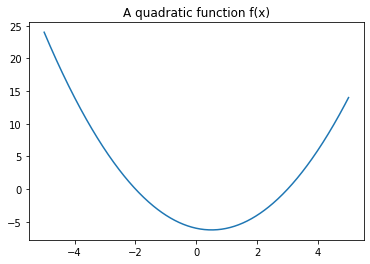

In [16]:
def f(x):
    return x ** 2 - x - 6

xx = np.linspace(-5, 5, num=500)
yy = f(xx)

plt.plot(xx, yy)
plt.title('A quadratic function f(x)')

We have learned in the previous notebook that at the minimum point of this function, the gradient of the function will be 0. So to find the minimum of the function analytically, we just need to calculate the gradient and equate it to 0.

- The function is $y = x^2 - x - 6$
- Its gradient is $\frac{dy}{dx} = 2x - 1$
- At the minumum point, the gradient must be zero. Therefore at the minimum, $2x - 1 = 0$ or $x = \frac{1}{2}$.
- So, for $y$ to be at its lowest possible value, $x$ must be $0,5$.

### 2.2 Finding the maxima or minima using TensorFlow and trial and error

Instead of solving the equation for $\frac{dy}{dx} = 0$, we can use the fact that TensorFlow calculates the gradient for us. We can use the power of TensorFlow to evaluate the gradient of $y$ at different values of $x$, and see where the gradient is 0. Try this out for yourself, using trial and error. You should see that when $x$ is 0,5 the value of the gradient is 0.

In [17]:
# Use TensorFlow's GradientTape to track the gradient of the function with respect to the input variable

x = tf.Variable(1.0) # Change this value of x and see what value you get for the gradient.
# Find the value of x for which the gradient is 0

with tf.GradientTape() as tape:
    y = f(x)

# Print the gradient of the function with respect to the input variable
print(fr"The gradient of f(x) when x is {x.numpy()} is {tape.gradient(y, x).numpy()}")

The gradient of f(x) when x is 1.0 is 1.0


## 3 The gradient descent algorithm

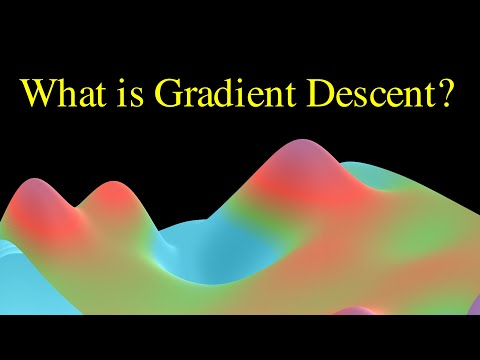

In [ ]:
YouTubeVideo("gj4g7CzDzJE", width=800, height=500)

Imagine you are at the top of a mountain and you want to reach the bottom as quickly as possible. The fastest way to descend would be to take small steps in the steepest direction downwards.

In gradient descent, we start with an initial guess and then calculate the gradient (slope) of the function at that point. The gradient tells us the direction of the steepest descent, so we take a step in that direction. We repeat this process, each time taking a step in the direction of the negative gradient, which brings us closer to the minimum value of the function.

The size of the step we take is determined by a parameter called the **learning rate**, which controls how quickly we converge to the minimum. If the learning rate is too high, we may overshoot the minimum and if it's too low, it may take a long time to converge.

Through many iterations, we gradually move towards the minimum of the function until we reach a point where the gradient is very small, indicating that we are very close to the minimum. At this point, we have found an approximate minimum of the function using gradient descent.

![Gradient descent illustration](gradient_descent_example.gif)

Here is the equation for a single step of gradient descent, with one independent variable:

$x_{new} = x_{old} - \alpha \frac{dy}{dx}$

Here,
- $y$ is the function we are trying to minimize
- $\frac{dy}{dx}$ is the gradient of this function with respect to the independent variable {x}
- $x_{old}$ is the previous value of the independent variable that we are changing
- $x_{new}$ will be the updated value of the independent variable after one step
- $\alpha$ is a parameter we can choose ourselves, and is called the **learning rate**. This determines the size of the step we take each time.

### 3.1 Finding the maxima or a minima using gradient descent in one variable

Let us use our example function to illustrate gradient descent. Let us start by randomly picking a value for x and a value for the learning rate $\alpha$. We run the gradient descent algorithm in a loop, until the value of x doesn't change by much any more, indicating the algorithm has **converged**.

In [18]:
# Counter to track the number of iterations
counter = 0

# Starting value of x
x = tf.Variable(3.0)

# Choose a value for the learning rate
α = 0.1

# Run gradient descent in a loop
while(True):
    
    counter += 1
    
    # Step 1: evaluate f(x) and calculate the gradient
    with tf.GradientTape() as tape:
        tape.watch(x) # This is necessary to tell TensorFlow which independent variable to track
        y = f(x)
    
    grad = tape.gradient(y, x).numpy()
    print(grad)
    
    # Step 2: apply the gradient descent formula to update x
    x_new = x - α * grad
    
    print(f"After {counter} steps of gradient descent, the value of x has changed from {x.numpy()} to {x_new.numpy()}")
    
    # Step 3: Check if x has changed a lot. If not, then break out of the loop.
    if np.abs(x_new.numpy() - x.numpy())< 1e-10:
        break
    else:
        # Update x
        x = x.assign(x_new.numpy())
        
    
        
# Print the value of x you found using gradient descent
print(f"The final value of x is {x.numpy()}")

5.0
After 1 steps of gradient descent, the value of x has changed from 3.0 to 2.5
4.0
After 2 steps of gradient descent, the value of x has changed from 2.5 to 2.0999999046325684
3.1999998
After 3 steps of gradient descent, the value of x has changed from 2.0999999046325684 to 1.7799999713897705
2.56
After 4 steps of gradient descent, the value of x has changed from 1.7799999713897705 to 1.5239999294281006
2.0479999
After 5 steps of gradient descent, the value of x has changed from 1.5239999294281006 to 1.3191999197006226
1.6383998
After 6 steps of gradient descent, the value of x has changed from 1.3191999197006226 to 1.1553599834442139
1.31072
After 7 steps of gradient descent, the value of x has changed from 1.1553599834442139 to 1.0242879390716553
1.0485759
After 8 steps of gradient descent, the value of x has changed from 1.0242879390716553 to 0.9194303750991821
0.83886075
After 9 steps of gradient descent, the value of x has changed from 0.9194303750991821 to 0.8355442881584167
0

Some questions for you:

1. What do you think would happen if the learning rate $\alpha$ was very small? Try using a small value of $\alpha$ and seeing how long it takes to converge.
2. What do you think would happen if the learning rate $\alpha$ was very large? Try using a large value of $\alpha$ and seeing if it converges, and if so, how long it takes to converge.
3. What would happen if we had a different starting value for $x$? Try out different starting values for $x$.

In order to make this even clearer for you, here is some code that makes a nice visualization of the gradient descent process for this function. You don't have to worry about the code used for this, this is just to illustrate visually what happens with gradient descent.

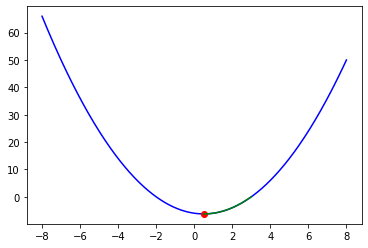

The final value of x is 0.5000001192092896 after 76 steps.


In [23]:
from IPython.display import clear_output
from time import sleep

# Counter to track the number of iterations
counter = 0

# Starting value of x
x = tf.Variable(3.0)

# Choose a value for the learning rate
α = 0.1

# Array to store the values of x and f(x) at each iteration
history_x = []
history_y = []

# Set up animation
fig = plt.figure(figsize=(10, 6))
x_vals = np.linspace(-8, 8, 1000)
y_vals = f(x_vals)

# Run gradient descent in a loop
while(True):
    
    counter += 1
    
    # Step 1: evaluate f(x) and calculate the gradient
    with tf.GradientTape() as tape:
        tape.watch(x) # This is necessary to tell TensorFlow which independent variable to track
        y = f(x)
    
    grad = tape.gradient(y, x).numpy()
    
    # Step 2: apply the gradient descent formula to update x
    x_new = x - α * grad
    
    # Plot the function
    plt.plot(x_vals, y_vals, 'b-')
    
    # Plot the current value of f(x)
    history_x.append(x.numpy())
    history_y.append(y.numpy())
    plt.plot(x.numpy(), y.numpy(), 'ro')
    
    # Plot the values of f(x) from the previous iterations
    if counter > 1:
        plt.plot(history_x, history_y, 'g-')
        
    # Add to animation
    plt.show()
        
    # Step 3: Check if x has changed a lot. If not, then break out of the loop.
    if np.abs(x_new.numpy() - x.numpy())< 1e-10:
        break
    else:
        # Update x
        x = x.assign(x_new.numpy())
        
    # Clear plot
    sleep(0.2)
    clear_output(wait=True)

plt.close()

# Print the value of x you found using gradient descent
print(f"The final value of x is {x.numpy()} after {counter} steps.")


### 3.2 Finding the maxima or a minima using gradient descent with more than one independent variable

When the function $f$ depends on more than one independent variable, the procedure for gradient descent is adapted to update every one of the independent variables simultaneously. Now, we have to calculate the gradient of $f$ with respect to each independent variable individually, and perform the update step on each independent variable. Calculating the gradient with respect to an individual independent variable is called **partial differentiation**, and the gradient you calculate is called the **partial derivative**. Here are the equations:

$x_{(1)new} = x_{(1)old} - \alpha \frac{\partial{y}}{\partial{x_1}}$  
$x_{(2)new} = x_{(2)old} - \alpha \frac{\partial{y}}{\partial{x_2}}$  
$x_{(3)new} = x_{(3)old} - \alpha \frac{\partial{y}}{\partial{x_3}}$  

And so on. $\partial$ represents the partial derivative for each independent variable.

![Gradient descent in 2 variables](https://miro.medium.com/max/960/0*aTPNDBI5ACQE1XFz.gif)

## 4 Examples of gradient descent optimization

### 4.1 Solving an optimization problem using gradient descent

We are going to look at a function that has a single minimum point. This function is $e^x - \log(x)$. Let us take a look at the function:

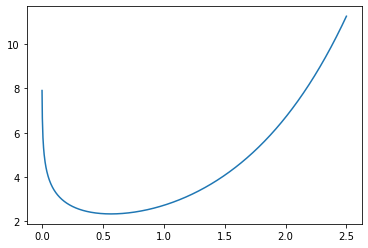

In [24]:
def f2(x):
    return np.exp(x) - np.log(x)

xx = np.linspace(0.001, 2.5, num=1000)
yy = f2(xx)

plt.plot(xx, yy)

Even though the function looks simple, finding its minimum point analytically is extremely complicated. The gradient of this function is given by $\frac{dy}{dx} = e^x - \frac{1}{x}$. If we equate this to zero and try to solve for $x$, we are in for a tough time!

However, we can use gradient descent to numerically compute the minimum of the function. In this case, since we are using numpy operations, we need to rewrite our function using TensorFlow operations.

In [31]:
def f2(x):
    return tf.exp(x) - tf.math.log(x)

In [30]:
# def f2(x):
#     return x * tf.sin(x ** 2) + 1

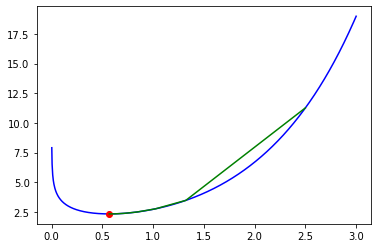

The final value of x is 0.5671433210372925 after 28 steps


In [32]:
from IPython.display import clear_output
from time import sleep

# Counter to track the number of iterations
counter = 0

# Starting value of x
x = tf.Variable(2.5)

# Choose a value for the learning rate
α = 0.1

# Array to store the values of x and f(x) at each iteration
history_x = []
history_y = []

# Set up animation
fig = plt.figure(figsize=(10, 6))
x_vals = np.linspace(0.001, 3, 1000)
y_vals = f2(x_vals)

# Run gradient descent in a loop
while(True):
    
    counter += 1
    
    # Step 1: evaluate f(x) and calculate the gradient
    with tf.GradientTape() as tape:
        tape.watch(x) # This is necessary to tell TensorFlow which independent variable to track
        y = f2(x)
    
    grad = tape.gradient(y, x).numpy()
    
    # Step 2: apply the gradient descent formula to update x
    x_new = x - α * grad
    
    # Plot the function
    plt.plot(x_vals, y_vals, 'b-')
    
    # Plot the current value of f2(x)
    history_x.append(x.numpy())
    history_y.append(y.numpy())
    plt.plot(x.numpy(), y.numpy(), 'ro')
    
    # Plot the values of f2(x) from the previous iterations
    if counter > 1:
        plt.plot(history_x, history_y, 'g-')
        
    # Add to animation
    plt.show()
    
    # Step 3: Check if x has changed a lot. If not, then break out of the loop.
    if np.abs(x_new.numpy() - x.numpy())< 1e-10:
        break
    else:
        # Update x
        x = x.assign(x_new.numpy())
        
    # Clear plot
    sleep(0.1)
    clear_output(wait=True)

plt.close()

# Print the value of x you found using gradient descent
print(f"The final value of x is {x.numpy()} after {counter} steps")


### 4.2 Solving a linear regression using gradient descent

In a previous notebook we saw how to perform linear regression using scikit-learn, and then using linear algebra and the matrix method. The linear algebra solution requires a lot of computational power, especially if the amount of data being used is high, because this involves several matrix calculations. Gradient descent however, requires less computational power, but more iterations.

The principle behind solving a regression using gradient descent is as follows:
- Define a loss function. In the case of regression, this can be the root mean squared error for example.
- Start with randomly chosen values for the coefficients $b_0$, $b_1$, etc. 
- Calculate the root mean squared error with these coefficients.
- Calculate the gradient off the RMSE with respect to the coefficients.
- Update the coefficients using gradient descent.
- Repeat until the RMSE is very low.

Let's see an example. We will go back to our height and shoe size dataset from the regression notebook.

<AxesSubplot:xlabel='height', ylabel='shoe_size'>

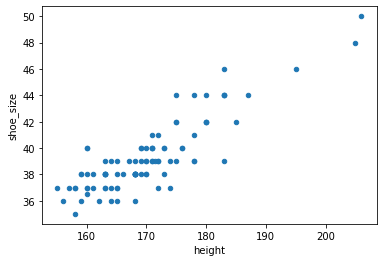

In [28]:
import pandas as pd

height_shoe_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MakeITWork/Week_12/wo_men.csv').dropna()
height_shoe_df_clean = height_shoe_df[(height_shoe_df['height'] > 100) & (height_shoe_df['height'] < 250)]
height_shoe_df_clean.plot.scatter(x='height', y='shoe_size')

We need to convert the data into tensors for TensorFlow to use.

In [33]:
x = tf.convert_to_tensor(height_shoe_df['height'], dtype='float32')
y = tf.convert_to_tensor(height_shoe_df['shoe_size'], dtype='float32')

Pick starting values for the coefficients of our model.

In [34]:
# Starting value of b_0
b_0 = tf.Variable(1.0, dtype='float32')

# Starting value of b_1
b_1 = tf.Variable(1.0, dtype='float32')

Define the loss function.

In [35]:
# Function to calculate RMSE
def RMSE(b_0, b_1):
    return tf.sqrt(tf.math.reduce_mean(tf.square(y - (b_0 + b_1 * x) )))

Run gradient descent in a loop.

In [36]:
iterations = 500
counter = 0

# Pick the learning rate
lr = 0.0001

loss_curve =[]

while (counter < iterations):
    # Step 1: evaluate f(x) and calculate the gradient
    with tf.GradientTape() as tape:
        tape.watch([b_0, b_1]) # This is necessary to tell TensorFlow which independent variables to track
        r = RMSE(b_0, b_1)
        
    # Step 2: Calculate the partial gradients. This is possible using tape.gradient()
    partial_gradients = tape.gradient(r, [b_0, b_1])
    
    # Step 3: Apply the updates to the variables
    b_0.assign_add(-lr * partial_gradients[0])
    b_1.assign_add(-lr * partial_gradients[1])
    
    loss_curve.append(r.numpy())
    
    # Step 3: Update counter
    counter += 1
    
print(f"The final RMSE is {r.numpy()}, for intercept {b_0.numpy()} and coefficient {b_1.numpy()}")

The final RMSE is 7.614284992218018, for intercept 1.0041718482971191 and coefficient 0.22608502209186554


Let us see what the loss looks like with each step of gradient descent.

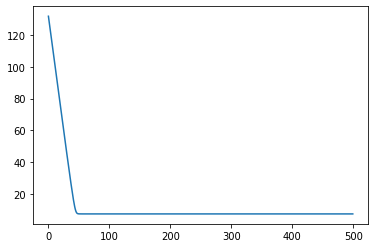

In [37]:
plt.plot(loss_curve)

Now that we have the optimized values of the coefficients, we can plot the trained model.

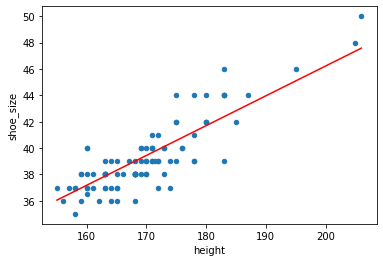

In [38]:
def final_model(x):
    y = b_0.numpy() + b_1.numpy() * x
    return y

xrange = np.linspace(min(height_shoe_df_clean['height']), max(height_shoe_df_clean['height']), num=100)

yrange = [final_model(h) for h in xrange]

height_shoe_df_clean.plot.scatter(x='height', y='shoe_size')
plt.plot(xrange, yrange, 'r-')
plt.show()

## 5 Exercises

#### An electronics company sells drones from their store. The company charges their customers a price 'p' euro per drone. The company knows that the price of the drone will affect demand. In other words, if the unit price rises, the demand for the item usually declines. The company hires you to optimize the cost of the drone to maximize profit. With your state-of-the-art data science knowledge you figure out thethe relationship between operating income and cost using the following formula: $R = -5p^2 + 300p - 2500$. (R is the company income and p is the cost per drone)

#### Question 1: Plot the function of company income vs the cost price per drone.

In [ ]:
## Your code here



#### Question 2: Use gradient descent to find at what cost price the company receives maximum profits.

In [ ]:
## Your code here



#### Question 3: In this notebook, you saw an example of gradient descent being used to solve a linear regression. What would change if instead of linear regression we wanted to use gradient descent for logistic regression?